## Lesson 6. Raster Exercises

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rioxarray as rxr
from rasterio.plot import plotting_extent   # Used to plot raster and vector data together
import earthpy as et
import earthpy.plot as ep

In [3]:
sns.set(font_scale=1.5, style='white')

In [4]:
data_path = et.data.get_data('colorado-flood')

#### Challenge 1. Open and Plot Hillshade

In [5]:
pre_DTM_hill_path = os.path.join(data_path,
                                 'spatial',
                                 'boulder-leehill-rd',
                                 'pre-flood',
                                 'lidar',
                                 'pre_DTM_hill.tif')
pre_DTM_hill = rxr.open_rasterio(pre_DTM_hill_path, masked=True)
pre_DTM_hill

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float64]
Coordinates:
  * band         (band) int32 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [6]:
help(ep.plot_bands)

Help on function plot_bands in module earthpy.plot:

plot_bands(arr, cmap='Greys_r', figsize=(12, 12), cols=3, title=None, extent=None, cbar=True, scale=False, vmin=None, vmax=None, ax=None, alpha=1, norm=None)
    Plot each band in a numpy array in its own axis.
    
    Assumes band order (band, row, col).
    
    Parameters
    ----------
    arr : numpy array
        An n-dimensional numpy array to plot.
    cmap : str (default = "Greys_r")
        Colormap name for plots.
    figsize : tuple (default = (12, 12))
        Figure size in inches.
    cols : int (default = 3)
        Number of columns for plot grid.
    title : str or list (optional)
        Title of one band or list of titles with one title per band.
    extent : tuple (optional)
        Bounding box that the data will fill: (minx, miny, maxx, maxy).
    cbar : Boolean (default = True)
        Turn off colorbar if needed.
    scale : Boolean (Default = True)
        Turn off bytescale scaling if needed.
    vmin : In

In [7]:
pre_DTM_hill.rio.shape

(2000, 4000)

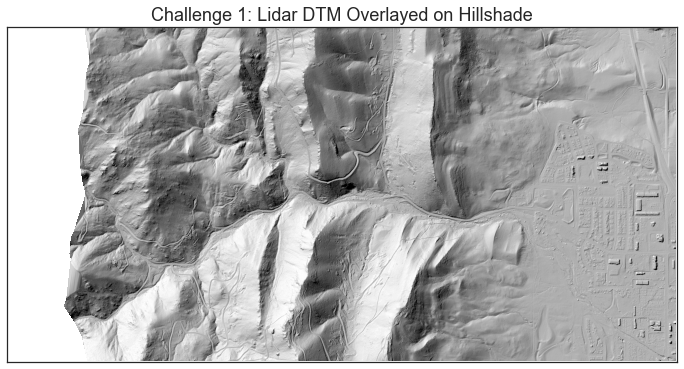

<AxesSubplot:title={'center':'Challenge 1: Lidar DTM Overlayed on Hillshade'}>

In [8]:
ep.plot_bands(pre_DTM_hill,
              figsize=(12,12),
              title='Challenge 1: Lidar DTM Overlayed on Hillshade',
              cmap='gray',
              cbar=False)

#### Challenge 2: Overlay DTM Over DTM Hillshade

In [9]:
pre_DTM_path = os.path.join(data_path,
                            'spatial',
                            'boulder-leehill-rd',
                            'pre-flood',
                            'lidar','pre_DTM.tif')
pre_DTM = rxr.open_rasterio(pre_DTM_path, masked=True)
pre_DTM

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float64]
Coordinates:
  * band         (band) int32 1
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [10]:
pre_DTM_hill.rio.crs == pre_DTM.rio.crs

True

In [11]:
pre_DTM_hill.rio.bounds() == pre_DTM.rio.bounds()

True

<AxesSubplot:>

<AxesSubplot:>

[Text(0.5, 1.0, 'Challenge 2: Lidar DTM Overlayed on Hillshade')]

(-0.5, 3999.5, 1999.5, -0.5)

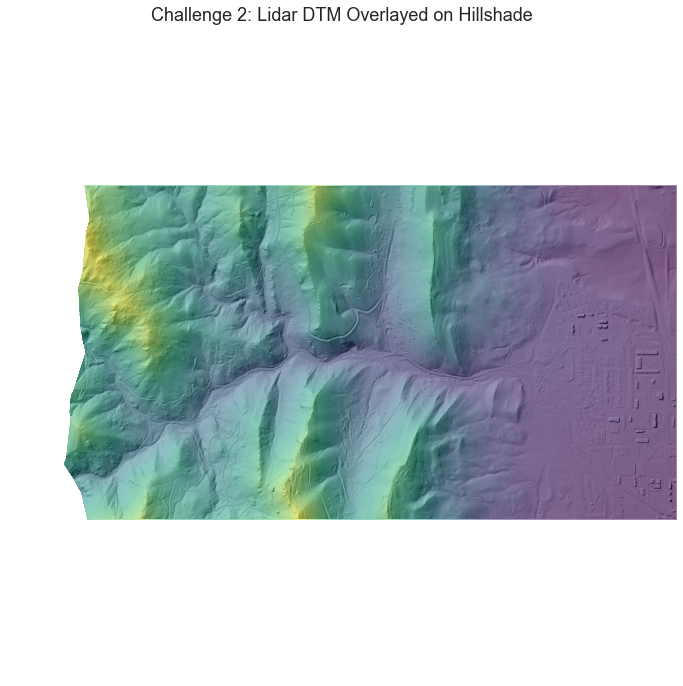

In [12]:
f, ax = plt.subplots(figsize=(12,12))

ep.plot_bands(pre_DTM_hill,
              ax=ax,
              cmap='gray',
              cbar=False)
ep.plot_bands(pre_DTM,
              ax=ax,
              cmap='viridis',
              alpha=0.5,
              cbar=False)
ax.set(title='Challenge 2: Lidar DTM Overlayed on Hillshade')
plt.axis('equal')
ax.set_axis_off()
plt.show()

#### Challenge 3. Add A Site Boundary to Your Raster Plot

In [13]:
site_bdy_path = os.path.join(data_path,
                             'spatial',
                             'boulder-leehill-rd',
                             'clip-extent.shp')
site_bdy = gpd.read_file(site_bdy_path)

In [14]:
site_bdy.crs

<Projected CRS: EPSG:32613>
Name: WGS 84 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 108°W to 102°W - by country
- bounds: (-108.0, 0.0, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
pre_DTM.rio.crs

CRS.from_epsg(32613)

Can't get plot to overlay correctly. Need to use <code>plotting_extent</code> and <code>rasterio</code> rather than <code>rioxarray</code>

In [16]:
from rasterio.plot import plotting_extent
import rasterio as rio
from rasterio import Affine

Re-open DTM and DTM_hill files using rasterio

In [17]:
pre_DTM_rio = rio.open(pre_DTM_path)

In [18]:
pre_DTM_hill_rio = rio.open(pre_DTM_hill_path)

In [19]:
pre_DTM_hill_rio_plotting_extent = plotting_extent(pre_DTM_hill_rio)

In [20]:
pre_DTM_rio_plotting_extent = plotting_extent(pre_DTM_rio)

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

[Text(0.5, 1.0, 'Challenge 2: Lidar DTM Overlayed on Hillshade')]

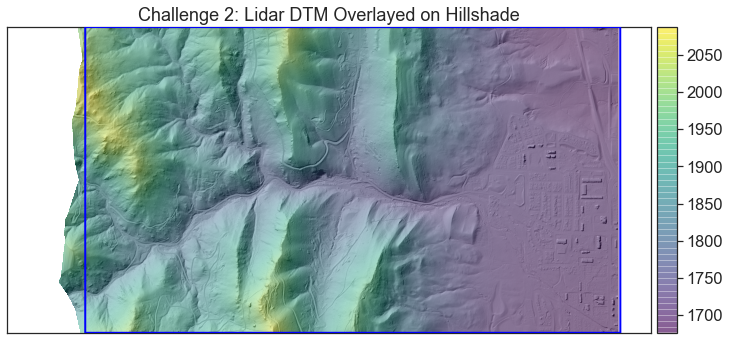

In [22]:
f, ax = plt.subplots(figsize=(12,12))

ep.plot_bands(pre_DTM_hill_rio.read(1, masked=True),
              ax=ax,
              cmap='gray',
              cbar=False,
              extent=pre_DTM_hill_rio_plotting_extent)
ep.plot_bands(pre_DTM_rio.read(1, masked=True),
              ax=ax,
              cmap='viridis',
              alpha=0.4,
              #cbar=False,
              extent=pre_DTM_rio_plotting_extent)
site_bdy.plot(ax=ax,
              color='None',
              edgecolor='blue',
              zorder=4,
              linewidth=2)
ax.set(title='Challenge 2: Lidar DTM Overlayed on Hillshade')
#plt.axis('equal')
#ax.set_axis_off()
plt.show()

#### Challenge 4: Open Post Flood Raster

Create a figure with two plots: pre and post-flood DTM

In [23]:
post_DTM_path = os.path.join(data_path,
                             'spatial',
                             'boulder-leehill-rd',
                             'post-flood',
                             'lidar',
                             'post_DTM.tif')
post_DTM = rxr.open_rasterio(post_DTM_path, masked=True)

[Text(0.5, 1.0, 'Pre-flood')]

[Text(0.5, 1.0, 'Post-flood')]

(472000.0, 476000.0, 4434000.0, 4436000.0)

Text(0.5, 0.98, 'Challenge 4\nPre and post flood lidar DTMs')

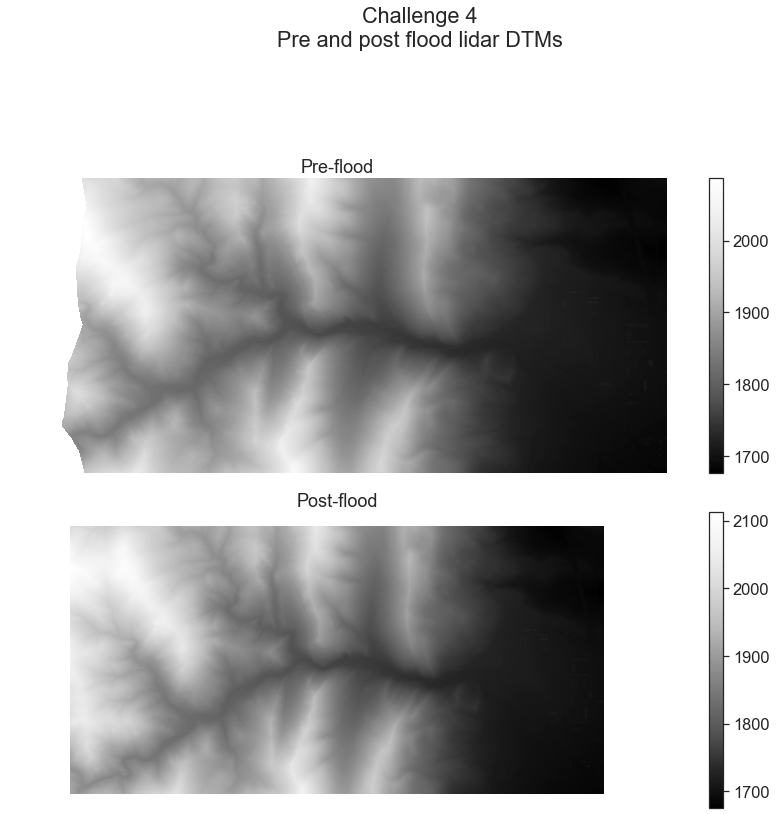

In [34]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

pre_DTM.plot(ax=ax1,
             cmap='Greys_r')
ax1.set(title='Pre-flood')
ax1.set_axis_off()

post_DTM.plot(ax=ax2,
              cmap='Greys_r')
ax2.set(title='Post-flood')
ax2.set_axis_off()

plt.axis('equal')
plt.suptitle('Challenge 4\nPre and post flood lidar DTMs')
plt.tight_layout(rect=[0,0.03,1,0.9])
plt.show()